<a href="https://colab.research.google.com/github/areesha-del/AI-ML-Hands-on/blob/main/Week_3_%2C_Day(2)_classwork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNSUPERVISED LEARNING:CLUSTERING**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/customer_clustering_dataset.csv")

print(df.head())


   CustomerID  Age   Income  SpendingScore
0           1   56  59722.0             62
1           2   46  34897.0             96
2           3   32  43912.0             37
3           4   60  45111.0             12
4           5   25  61535.0             55


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/customer_clustering_dataset.csv")

# Remove identifier column
features = df[["Age", "Income", "SpendingScore"]]

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create scaled DataFrame
scaled_df = pd.DataFrame(
    scaled_features,
    columns=["Age_scaled", "Income_scaled", "SpendingScore_scaled"]
)

print(scaled_df.head())


   Age_scaled  Income_scaled  SpendingScore_scaled
0    1.054732      -0.160924              0.456704
1    0.323802      -1.872726              1.636638
2   -0.699500      -1.251099             -0.410895
3    1.347105      -1.168422             -1.278493
4   -1.211152      -0.035910              0.213776


Inertia (Within-Cluster Sum of Squares): 372.77381085878875
Silhouette Score: 0.20952235054330529


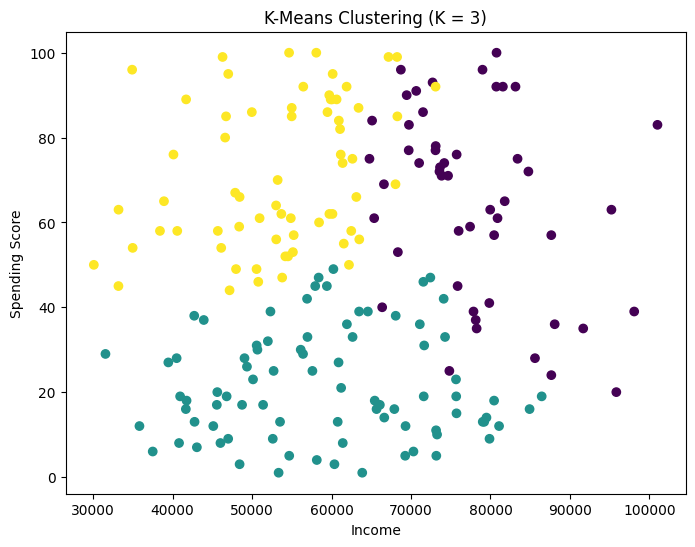

In [ ]:
# Step 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
df = pd.read_csv("/content/customer_clustering_dataset.csv")

# Step 2: Feature Selection (remove identifier column)
X = df[["Age", "Income", "SpendingScore"]]

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply K-Means with K = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 5: Add cluster labels to dataset
df["Cluster"] = cluster_labels

# Step 6: Evaluate the model
inertia = kmeans.inertia_
silhouette = silhouette_score(X_scaled, cluster_labels)

print("Inertia (Within-Cluster Sum of Squares):", inertia)
print("Silhouette Score:", silhouette)

# Step 7: Visualize clusters using two selected features
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Income"],
    df["SpendingScore"],
    c=df["Cluster"]
)

plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("K-Means Clustering (K = 3)")
plt.show()


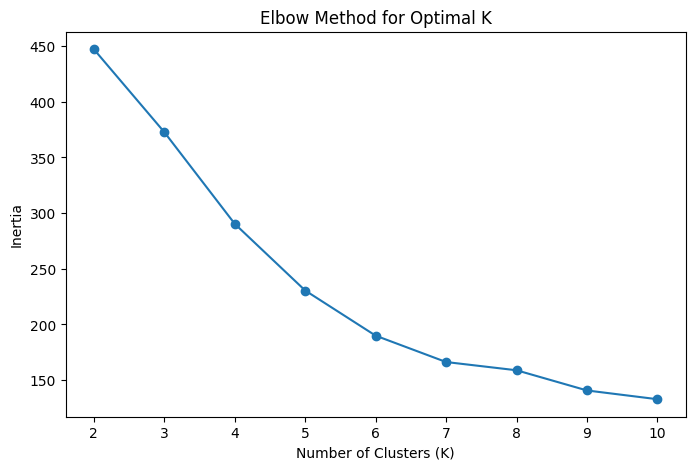

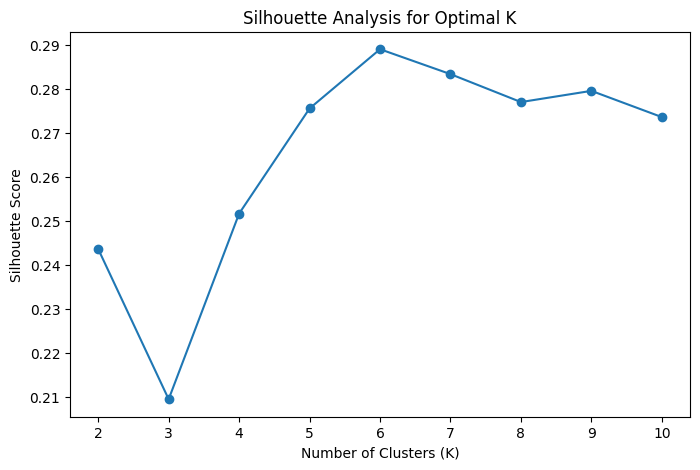

K = 2, Silhouette Score = 0.2437
K = 3, Silhouette Score = 0.2095
K = 4, Silhouette Score = 0.2517
K = 5, Silhouette Score = 0.2756
K = 6, Silhouette Score = 0.2891
K = 7, Silhouette Score = 0.2834
K = 8, Silhouette Score = 0.2771
K = 9, Silhouette Score = 0.2796
K = 10, Silhouette Score = 0.2737

Optimal Number of Clusters (K): 6


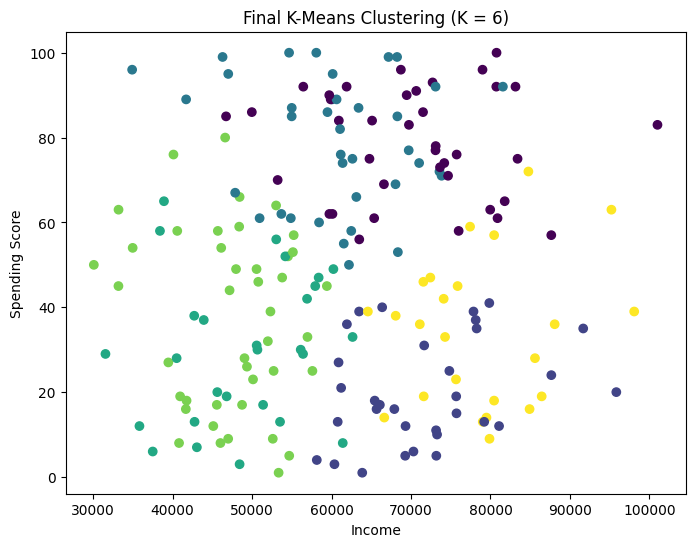

In [ ]:
# Step 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
df = pd.read_csv("customer_clustering_dataset.csv")

# Step 2: Feature Selection
X = df[["Age", "Income", "SpendingScore"]]

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------
# Step 4: Elbow Method (K = 2 to 10)
# ---------------------------------------------
inertia_values = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# ---------------------------------------------
# Step 5: Silhouette Analysis (K = 2 to 10)
# ---------------------------------------------
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.show()

# Print Silhouette Scores
for k, score in zip(K_range, silhouette_scores):
    print(f"K = {k}, Silhouette Score = {score:.4f}")

# ---------------------------------------------
# Step 6: Select Optimal K
# (Based on Elbow + Highest Silhouette Score)
# ---------------------------------------------
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print("\nOptimal Number of Clusters (K):", optimal_k)

# ---------------------------------------------
# Step 7: Retrain K-Means with Optimal K
# ---------------------------------------------
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["Optimized_Cluster"] = final_kmeans.fit_predict(X_scaled)

# ---------------------------------------------
# Step 8: Visualize Final Clusters
# ---------------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(
    df["Income"],
    df["SpendingScore"],
    c=df["Optimized_Cluster"]
)
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title(f"Final K-Means Clustering (K = {optimal_k})")
plt.show()


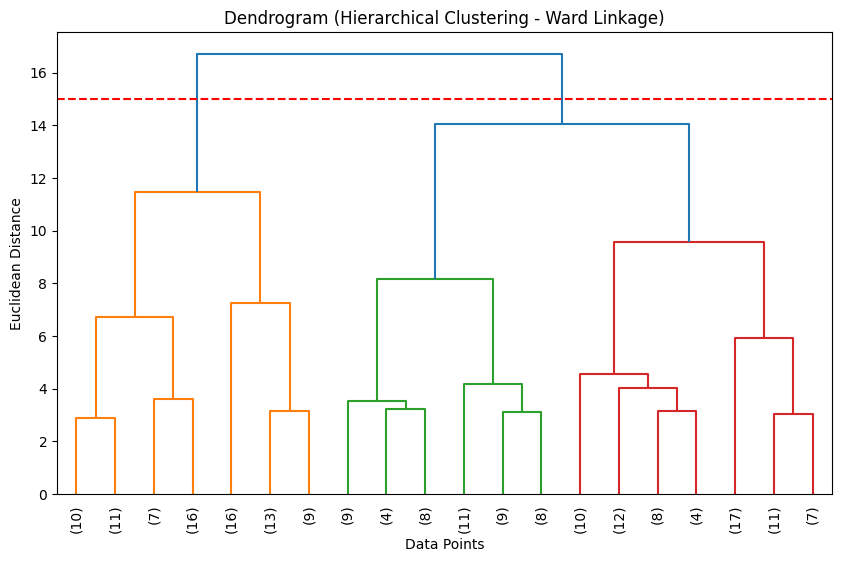

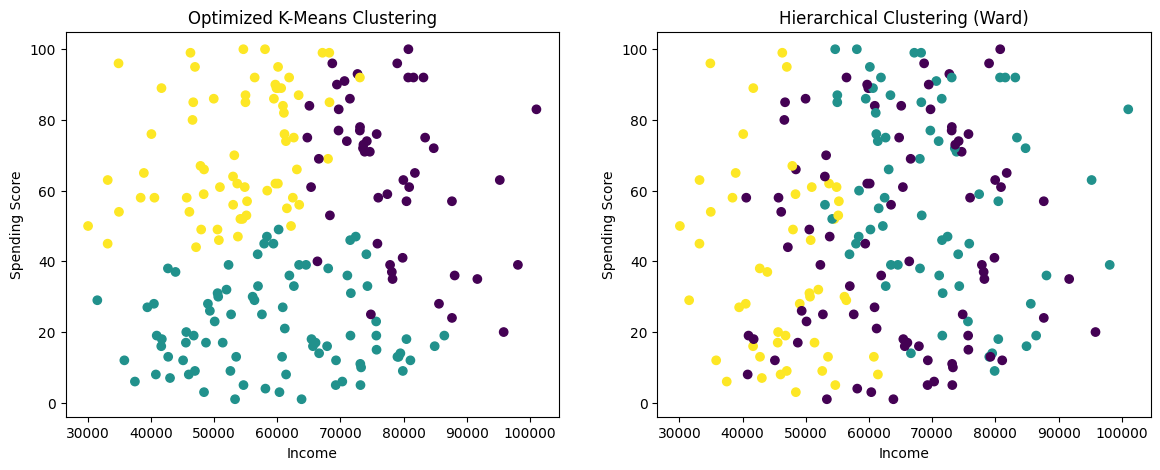

In [ ]:
# Step 0: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Load dataset
df = pd.read_csv("customer_clustering_dataset.csv")

# Step 2: Feature Selection
X = df[["Age", "Income", "SpendingScore"]]

# Step 3: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------
# Step 4: Hierarchical Clustering (Ward Linkage)
# ---------------------------------------------
hierarchical_model = AgglomerativeClustering(
    n_clusters=3,      # chosen from dendrogram cut
    linkage="ward"
)

df["Hierarchical_Cluster"] = hierarchical_model.fit_predict(X_scaled)

# ---------------------------------------------
# Step 5: Plot Dendrogram
# ---------------------------------------------
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    truncate_mode="lastp",
    p=20,
    leaf_rotation=90,
    leaf_font_size=10
)

plt.axhline(y=15, color='r', linestyle='--')  # horizontal cut
plt.title("Dendrogram (Hierarchical Clustering - Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# ---------------------------------------------
# Step 6: Optimized K-Means (from Step 3)
# ---------------------------------------------
optimal_k = 3  # replace with your optimal K if different

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# ---------------------------------------------
# Step 7: Visual Comparison of Clusters
# ---------------------------------------------
plt.figure(figsize=(14, 5))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(df["Income"], df["SpendingScore"], c=df["KMeans_Cluster"])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Optimized K-Means Clustering")

# Hierarchical Clusters
plt.subplot(1, 2, 2)
plt.scatter(df["Income"], df["SpendingScore"], c=df["Hierarchical_Cluster"])
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.title("Hierarchical Clustering (Ward)")

plt.show()
